In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

In [2]:
# Loading the data
wine = pd.read_csv('datasets/wine.csv', header=None, names=['type', 'alcohol', 'malic_acid', 'ash', 'ash_alcalinity', 'magnesium', 'total_phenols', 'flavanoids', 'nonflav_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'OD280/OD315', 'proline'])
wine.head()

,type,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Checking the NaN cells
print(wine.shape)
wine.isna().sum()

(178, 14)


type               0
alcohol            0
malic_acid         0
ash                0
ash_alcalinity     0
magnesium          0
total_phenols      0
flavanoids         0
nonflav_phenols    0
proanthocyanins    0
color_intensity    0
hue                0
OD280/OD315        0
proline            0
dtype: int64

In [6]:
# Separating the data into X, y
X = wine.drop(['type'], axis=1)
y = wine['type']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.5)

# Scaling the data (hopefully for better accuracy at the end)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

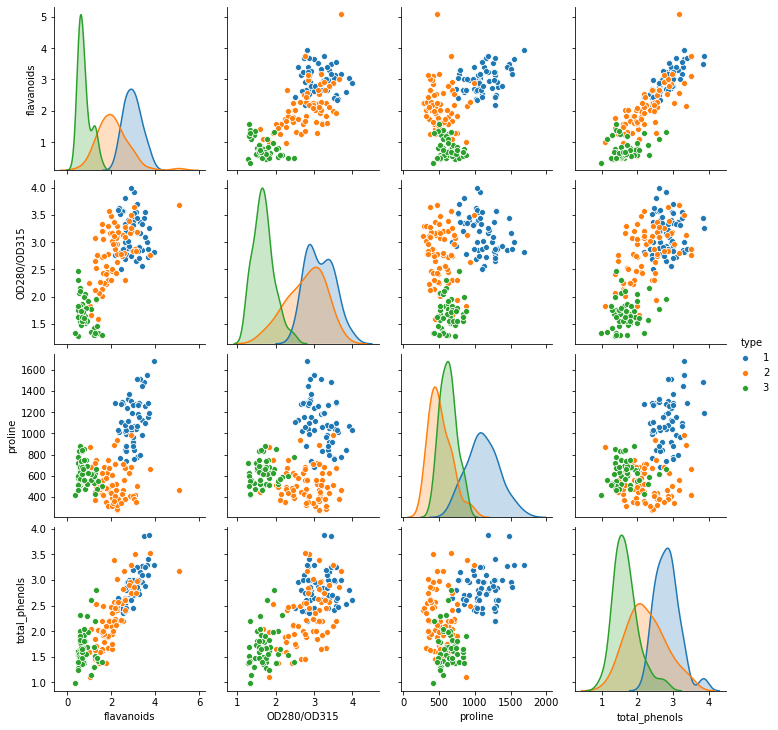

In [3]:
sns.pairplot(wine[['type', 'flavanoids', 'OD280/OD315', 'proline', 'total_phenols']], hue='type');

The pairplots illustrate the relationship between the variables which are the most correlated to the target values. It is even not hard to imagine putting lines to separate the three types of wine in some plots shown above.

In [8]:
wine.corr()

,type,alcohol,malic_acid,ash,ash_alcalinity,magnesium,total_phenols,flavanoids,nonflav_phenols,proanthocyanins,color_intensity,hue,OD280/OD315,proline
type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
ash_alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflav_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


---
# Decision Tree Classifier

DT is well suited to predict the data since it is obvious from the pair plots that the data is mostly separable by setting an intervals on different axis.

In [9]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Wine 0', 'Wine 1', 'Wine 2']))

              precision    recall  f1-score   support

      Wine 0       1.00      0.87      0.93        31
      Wine 1       0.89      0.94      0.91        34
      Wine 2       0.92      1.00      0.96        24

    accuracy                           0.93        89
   macro avg       0.94      0.94      0.94        89
weighted avg       0.94      0.93      0.93        89



---
# VPI model

Best accuracy: 0.9775280898876404


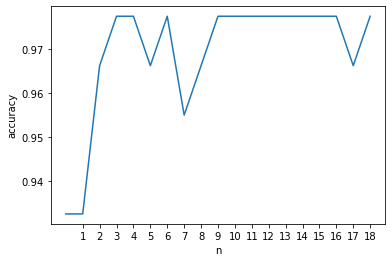

In [10]:
import vpi
import importlib
importlib.reload(vpi)
from vpi import *

accs = list()
for i in range(1,20):
    y_pred = vpi(X_test, X_train, y_train, n=i)
    acc = 0
    for j in range(len(y_pred)):
        if int(np.round(y_pred[j])) == y_test[j]:
            acc += 1
    accs.append(acc / len(y_pred))
print('Best accuracy:', max(accs))
plt.xlabel('n')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,20,1))
plt.plot(accs);

In [11]:
y_pred = vpi(X_test, X_train, y_train, n=16)
y_pred = [int(np.round(y)) for y in y_pred]
print(classification_report(y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       1.00      0.94      0.97        34
           3       0.96      1.00      0.98        24

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89

